# Pandas Basic

Pandas is built "on top" of NumPy which allows us to work on data easily. Thus, Numpy functions will generally work on pandas objects as well. At first, we will import both libraries:

In [0]:
import numpy as np
import pandas as pd

## DataFrame Class Pt. 1

Here, we will learn some basic operations using Pandas library

### Create new DataFrame

In [2]:
data = [10, 20, 30, 40]
df = pd.DataFrame(data, columns=['numbers'], index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


### Typical operations on DataFrame objects

Read all index

In [3]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Determine what are the available columns.

In [4]:
df.columns

Index(['numbers'], dtype='object')

Index slicing using characters or strings.

In [5]:
df.loc['c']

numbers    30
Name: c, dtype: int64

Index slicing using integers.

In [6]:
data = [10, 20, 30, 40]
df_num_idx = pd.DataFrame(data, columns=['numbers'])
df_num_idx.iloc[1:3]

,numbers
1,20
2,30


Sum up every numbers in rows

In [7]:
df.sum()

numbers    100
dtype: int64

Perform numeric operation on each data

In [8]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


Add a new column to the DataFrame

In [9]:
df['floats']=(1.5, 2.5, 3.5, 4.5);df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


Select the data at specific column

In [10]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

We can also create a new column by using a Dataframe.

In [11]:
df['names'] = pd.DataFrame(['Ali', 'Mutu', 'Lim', 'John'], index=['d', 'b', 'a', 'c']); df

,numbers,floats,names
a,10,1.5,Lim
b,20,2.5,Mutu
c,30,3.5,John
d,40,4.5,Ali


If we want to add a new row to the dataset, we can use append. But do note that this is just a temporary DataFrame and will not affect the original DataFrame.

Here, we show that we can add a new row of data by using a dictionary.

In [12]:
df.append({'numbers':25, 'floats': 24.72, 'names':'Fatimah'}, ignore_index=True)
#temporary object, will not affect the original df
#df

,numbers,floats,names
0,10,1.50,Lim
1,20,2.50,Mutu
2,30,3.50,John
3,40,4.50,Ali
4,25,24.72,Fatimah


Thus, we need to replace the old variable in order to 'replace' it. 

We can append a new row of data using DataFrame as well instead of a dictionary.

In [13]:
df = df.append(pd.DataFrame({'numbers': 10, 'floats': 5.6,'names': 'Henry'}, index=['z']));df

,numbers,floats,names
a,10,1.5,Lim
b,20,2.5,Mutu
c,30,3.5,John
d,40,4.5,Ali
z,10,5.6,Henry


## DataFrame Class Pt. 2

New, we will work on numerical data, add on new feature like DateTimeIndex and do some basic analysis.

First, we can generate some data for us to use.

In [67]:
np.random.seed(123)
gen_data = np.random.standard_normal((9,4))
gen_data.round(6)

array([[-1.085631,  0.997345,  0.282978, -1.506295],
       [-0.5786  ,  1.651437, -2.426679, -0.428913],
       [ 1.265936, -0.86674 , -0.678886, -0.094709],
       [ 1.49139 , -0.638902, -0.443982, -0.434351],
       [ 2.20593 ,  2.186786,  1.004054,  0.386186],
       [ 0.737369,  1.490732, -0.935834,  1.175829],
       [-1.253881, -0.637752,  0.907105, -1.428681],
       [-0.140069, -0.861755, -0.255619, -2.798589],
       [-1.771533, -0.699877,  0.927462, -0.173636]])

We can create a DataFrame directly by using the array object

In [68]:
df = pd.DataFrame(gen_data);df

,0,1,2,3
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186
5,0.737369,1.490732,-0.935834,1.175829
6,-1.253881,-0.637752,0.907105,-1.428681
7,-0.140069,-0.861755,-0.255619,-2.798589
8,-1.771533,-0.699877,0.927462,-0.173636


Next, we can rename all columns

In [69]:
df.columns = [['x1', 'x2', 'x3', 'x4']];df

,x1,x2,x3,x4
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186
5,0.737369,1.490732,-0.935834,1.175829
6,-1.253881,-0.637752,0.907105,-1.428681
7,-0.140069,-0.861755,-0.255619,-2.798589
8,-1.771533,-0.699877,0.927462,-0.173636


To handle with time series data efficiently, we must learn how to use time indices. 

Assume that our data in the four columns correspind to a month-end data, beginning in Jan 2020. We can generate a DateTimeIndex object using date_range as follows:

In [70]:
#periods = number of periods
#freq = frequency, can be weekly, monthly, quaterly or yearly
all_dates = pd.date_range('2020-1-1', periods=9, freq='M'); all_dates

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='M')

Previosly, we encountered indices composed of a string and int. For timeseries data, the indices we use is the DateTimeIndex object we generated earlier.

In [71]:
df.index = all_dates; df

,x1,x2,x3,x4
2020-01-31,-1.085631,0.997345,0.282978,-1.506295
2020-02-29,-0.578600,1.651437,-2.426679,-0.428913
2020-03-31,1.265936,-0.866740,-0.678886,-0.094709
2020-04-30,1.491390,-0.638902,-0.443982,-0.434351
2020-05-31,2.205930,2.186786,1.004054,0.386186
2020-06-30,0.737369,1.490732,-0.935834,1.175829
2020-07-31,-1.253881,-0.637752,0.907105,-1.428681
2020-08-31,-0.140069,-0.861755,-0.255619,-2.798589
2020-09-30,-1.771533,-0.699877,0.927462,-0.173636


With Datetime as the index we can select a range of data by a certain range.

In [156]:
gen_data = np.random.standard_normal((24,4))
gen_data.round(6)

dates = pd.date_range('2020-1-1', periods=24, freq='M')
df_twoYears = pd.DataFrame(gen_data, index=dates, columns=['x1', 'x2', 'x3', 'x4']); df_twoYears

,x1,x2,x3,x4
2020-01-31,-0.602340,-0.379730,0.032407,0.946186
2020-02-29,0.581590,-0.234415,-0.272176,-1.160130
2020-03-31,-0.759835,-0.654381,-0.149291,1.986763
2020-04-30,-0.675469,-0.295829,-2.052398,0.600571
2020-05-31,-1.577449,-0.906590,1.042335,-2.104928
2020-06-30,0.095920,0.800930,1.525444,-0.920093
2020-07-31,-0.624025,1.804436,-0.025060,-0.736264
2020-08-31,-0.717486,-0.972556,-0.439672,1.088220
2020-09-30,0.887766,-1.174270,0.214586,-0.402160
2020-10-31,0.782440,-0.156360,0.371525,-0.158605


In [153]:
#select data from year 2020
df_twoYears['2020']

,x1,x2,x3,x4
2020-01-31,-0.145364,1.868726,-0.518704,-0.062399
2020-02-29,-0.102911,-0.282628,0.142426,0.541231
2020-03-31,1.340099,-1.569256,-0.510343,-0.447771
2020-04-30,0.937850,-0.356663,-1.895176,0.087730
2020-05-31,-0.033689,0.179752,-1.040163,1.719035
2020-06-30,-0.323860,-0.188297,-0.900009,-0.931002
2020-07-31,-1.222737,-0.393311,-0.957582,2.056467
2020-08-31,-1.888492,-1.128331,-0.401414,0.673491
2020-09-30,-0.413757,0.675963,-0.986804,0.059291
2020-10-31,1.744041,-0.967744,0.419568,0.206928


## Basic Analytics

Just like NumPy arrays, we can apply perform multiple operations on the array via DataFrame. We can get column-wise sums, means and cumulative means as follows:

In [72]:
df.sum()

x1    0.870911
x2    2.621274
x3   -1.619401
x4   -5.303158
dtype: float64

In [73]:
df.mean()

x1    0.096768
x2    0.291253
x3   -0.179933
x4   -0.589240
dtype: float64

In [74]:
df.cumsum()

,x1,x2,x3,x4
2020-01-31,-1.085631,0.997345,0.282978,-1.506295
2020-02-29,-1.664231,2.648782,-2.143701,-1.935207
2020-03-31,-0.398295,1.782042,-2.822587,-2.029916
2020-04-30,1.093095,1.143140,-3.266569,-2.464268
2020-05-31,3.299025,3.329926,-2.262515,-2.078081
2020-06-30,4.036394,4.820658,-3.198349,-0.902252
2020-07-31,2.782513,4.182906,-2.291244,-2.330933
2020-08-31,2.642444,3.321151,-2.546863,-5.129522
2020-09-30,0.870911,2.621274,-1.619401,-5.303158


There's a shortcut to an often-used statistics for numerical datasets, the describe method:

In [75]:
df.describe()

,x1,x2,x3,x4
count,9.000000,9.000000,9.000000,9.000000
mean,0.096768,0.291253,-0.179933,-0.589240
std,1.387261,1.263003,1.116230,1.170512
min,-1.771533,-0.866740,-2.426679,-2.798589
25%,-1.085631,-0.699877,-0.678886,-1.428681
50%,-0.140069,-0.637752,-0.255619,-0.428913
75%,1.265936,1.490732,0.907105,-0.094709
max,2.205930,2.186786,1.004054,1.175829


In general, we can apply Numpy universal functions to pandas DataFrame objects.

For example:

In [76]:
np.sqrt(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,x1,x2,x3,x4
2020-01-31,NaN,0.998672,0.531957,NaN
2020-02-29,NaN,1.285082,NaN,NaN
2020-03-31,1.125138,NaN,NaN,NaN
2020-04-30,1.221225,NaN,NaN,NaN
2020-05-31,1.485237,1.478779,1.002025,0.621439
2020-06-30,0.858702,1.220955,NaN,1.084357
2020-07-31,NaN,NaN,0.952421,NaN
2020-08-31,NaN,NaN,NaN,NaN
2020-09-30,NaN,NaN,0.963049,NaN


We can plot out the graph easily by using the plot method.

Pandas provide a wrapper around matplotlib (a library that allows us to plot graph), but specifically designed for DataFrame object.

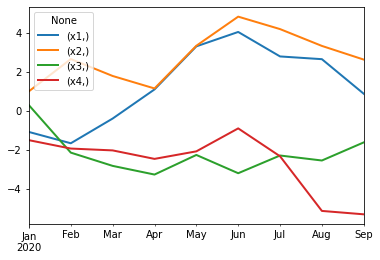

In [77]:
df.cumsum().plot(lw=2.0)

## Series Class

So far, we have been dealing with DataFrame class: 

In [78]:
type(df)

pandas.core.frame.DataFrame

There's also a class call Series class. We can get this class when selecting only a single column form the DataFrame object.

In [79]:
df[['x1']]

,x1
2020-01-31,-1.085631
2020-02-29,-0.578600
2020-03-31,1.265936
2020-04-30,1.491390
2020-05-31,2.205930
2020-06-30,0.737369
2020-07-31,-1.253881
2020-08-31,-0.140069
2020-09-30,-1.771533


In [80]:
type(df[['x1']])

pandas.core.frame.DataFrame

The main DataFrame methods works on Series objects as well. For example, we can plot out the cummulative summation plot as follows:

Text(0, 0.5, 'value')

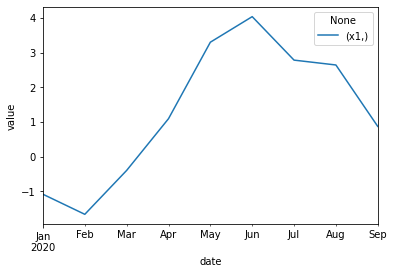

In [84]:
import matplotlib.pyplot as plt

df[['x1']].cumsum().plot()
plt.xlabel('date')
plt.ylabel('value')

Refer here for further details on Series class: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series

## More on dates and times

Dates and times creation

In [30]:
# TIMES
rng = pd.date_range('2020 Jan 1', periods = 10, freq = 'D');rng

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

### Timestamp

Each DatetimeIndex consists of Time Stamp

In [87]:
df.index[0]

Timestamp('2020-01-31 00:00:00', freq='M')

We can generate Timestamp by using the following methods.

In [93]:
pd.Timestamp('2020-07-10')

Timestamp('2020-07-10 00:00:00')

In [94]:
# We can include more details 
pd.Timestamp('2020-07-10 10')

Timestamp('2020-07-10 10:00:00')

In [95]:
# Or even more...
pd.Timestamp('2020-07-10 10:15')

Timestamp('2020-07-10 10:15:00')

In [96]:
# we can create Timestamp via datetime.datetime object
pd.Timestamp(2020, 7, 10, 10)

Timestamp('2020-07-10 10:00:00')

With Timestamp we can perform date and time arithmetic with absolute and relative time increments.

In [99]:
#what day is 10th of July 2020?

date = pd.Timestamp('2020-07-10')
date.day_name()

'Friday'

We can also perform arithmetic operation on the Timestamp object.

In [107]:
# add 1 day
friday = date
saturday = friday + pd.Timedelta('1 day')
saturday.day_name()

'Saturday'

In [110]:
# add 1 business day

monday = friday + pd.offsets.BDay()
monday.day_name()

'Monday'

### Timespans

Timestamped data is basic type of time series data that associates values with points in time.

In [119]:
pd.Timestamp('2020-07-10')

Timestamp('2020-07-10 00:00:00')

In many cases, it is more natural to associate things like change variables with a time span instead. We can represent the span using Period. For example:

In [122]:
#What are the extra details given by the code?
pd.Period('2020-07')

Period('2020-07', 'M')

In [123]:
#How details it can go?
pd.Period('2020-07-10')

Period('2020-07-10', 'D')

In [115]:
pd.Period('2020-07-10 10')

Period('2020-07-10 10:00', 'H')

In [116]:
pd.Period('2020-07-10 10:10')

Period('2020-07-10 10:10', 'T')

In [114]:
pd.Period('2020-07-10 10:10:10')

Period('2020-07-10 10:10:10', 'S')

Arithmetric operations work on Period as well.

In [121]:
pd.Period('2016-01-01 10:10') + pd.Timedelta('2 day')

Period('2016-01-03 10:10', 'T')

Remember how we can create a range of Timestamp using date_range? We can create a range of Periods using period_range

In [130]:
#create a range of periods of 10 business days
prng= pd.period_range('2020-07-10 10:10', freq = 'B', periods = 10);prng

PeriodIndex(['2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15',
             '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
             '2020-07-22', '2020-07-23'],
            dtype='period[B]', freq='B')

Indexing with Time Objects

In [137]:
#from previous example, we can create a Series with Timestamp such as follows
rng = pd.date_range('2020 Jul 1', periods = 10, freq = 'D')
rng
ts_idx_timestamp = pd.Series(range(len(rng)), index = rng)
ts_idx_timestamp

2020-07-01    0
2020-07-02    1
2020-07-03    2
2020-07-04    3
2020-07-05    4
2020-07-06    5
2020-07-07    6
2020-07-08    7
2020-07-09    8
2020-07-10    9
Freq: D, dtype: int64

In [136]:
# Sometimes, it makes more sense to think about the index as a time span rather than a single point in time

periods = [pd.Period('2020-01'), pd.Period('2020-02'), pd.Period('2020-03')]
ts_idx_periods = pd.Series(np.random.randn(len(periods)), index = periods)
ts_idx_periods

2020-01    0.283627
2020-02   -0.805367
2020-03   -1.727669
Freq: M, dtype: float64

Pandas will convert the Timestamp and Period to DatetimeIndex and PeriodIndex repectively.

In [143]:
type(ts_idx_timestamp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [144]:
type(ts_idx_periods.index)

pandas.core.indexes.period.PeriodIndex

We can convert Timestamp to Period  indices with to_period and vice versa with to_timestamp

In [158]:
ts = pd.Series(range(10), pd.date_range('2020-01-10 8:00', periods = 10, freq = 'H'))
ts

2020-01-10 08:00:00    0
2020-01-10 09:00:00    1
2020-01-10 10:00:00    2
2020-01-10 11:00:00    3
2020-01-10 12:00:00    4
2020-01-10 13:00:00    5
2020-01-10 14:00:00    6
2020-01-10 15:00:00    7
2020-01-10 16:00:00    8
2020-01-10 17:00:00    9
Freq: H, dtype: int64

In [159]:
ts_period = ts.to_period()
ts_period

2020-01-10 08:00    0
2020-01-10 09:00    1
2020-01-10 10:00    2
2020-01-10 11:00    3
2020-01-10 12:00    4
2020-01-10 13:00    5
2020-01-10 14:00    6
2020-01-10 15:00    7
2020-01-10 16:00    8
2020-01-10 17:00    9
Freq: H, dtype: int64

In [161]:
ts_period['2020-01-10 08:30':'2020-01-10 11:45'] # we have the concept of overlap with time periods

2020-01-10 08:00    0
2020-01-10 09:00    1
2020-01-10 10:00    2
2020-01-10 11:00    3
Freq: H, dtype: int64

In [164]:
ts['2020-01-10 08:30':'2020-01-10 11:45'] # we have the concept of include with timestamps

2020-01-10 09:00:00    1
2020-01-10 10:00:00    2
2020-01-10 11:00:00    3
Freq: H, dtype: int64

Time Stamp vs Time Span (Period) 

In [165]:
p = pd.Period('2017-06-13')
test = pd.Timestamp('2017-06-13 22:11')
p.start_time < test < p.end_time

True

## References

1. Python for Finance (2014), Yves Hilpisch
2. https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/blob/master/1.%20Dates%20%26%20Times.ipynb